In [1]:
import gc
import math
import os
import pathlib
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
def detect_failure(df):
    failures = df.index[(df.time_to_failure.shift(1) > df.time_to_failure) & (df.time_to_failure.shift(-1) > df.time_to_failure)].tolist()
    return failures

In [4]:
earthquake_margin_indexes =[
    5656573,
    50085877,
    104677355,
    138772452,
    187641819,
    218652629,
    245829584,
    307838916,
    338276286,
    375377847,
    419368879,
    461811622,
    495800224,
    528777114,
    585568143,
    621985672
]

In [5]:
earthquake_1_data_len = earthquake_margin_indexes[1] - earthquake_margin_indexes[0]

In [6]:
#pd.read_csv?

train_df = pd.read_csv(
    '../input/train/train.csv',
    #nrows=100000000,
    #names=['acoustic_data', 'time_to_failure'],
    dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32},
    #skiprows=earthquake_margin_indexes[0],
    #nrows=earthquake_1_data_len
)

In [7]:
for_investigation_df = pd.read_csv(
    '../input/train/train.csv',
    #nrows=100000000,
    names=['acoustic_data', 'time_to_failure'],
    dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32},
    skiprows=earthquake_margin_indexes[0],
    nrows=earthquake_1_data_len
)

In [8]:
#earthquake_margin_indexes = detect_failure(train_df)

In [9]:
#print(earthquake_margin_indexes)

In [10]:
#train_df.info()

In [11]:
#for_investigation_df = train_df.iloc[earthquake_margin_indexes[0]:earthquake_margin_indexes[1], :]

In [12]:
#earthquake_1_data_len = for_investigation_df.shape[0]

In [13]:
for_investigation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44429304 entries, 0 to 44429303
Data columns (total 2 columns):
acoustic_data      float32
time_to_failure    float32
dtypes: float32(2)
memory usage: 339.0 MB


In [14]:
for_investigation_df.head()

,acoustic_data,time_to_failure
0,5.0,0.000795
1,4.0,0.000795
2,4.0,11.540800
3,5.0,11.540800
4,6.0,11.540800


In [15]:
acoustic_data_chunks = for_investigation_df['acoustic_data'].values[::20]
time_to_failure_chunks = for_investigation_df['time_to_failure'].values[::20]

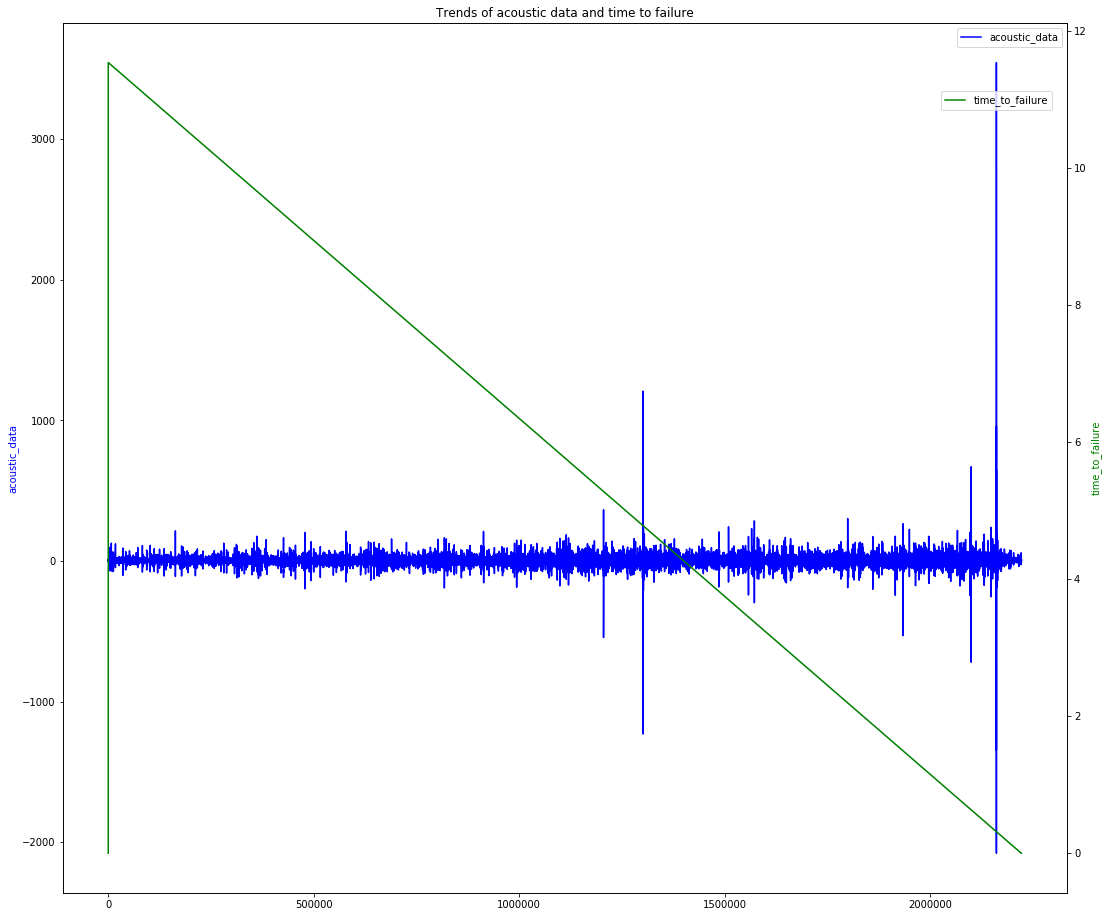

In [16]:
fig1, ax1 = plt.subplots(figsize=(18, 16))
plt.title("Trends of acoustic data and time to failure")
plt.plot(acoustic_data_chunks, color='b')
ax1.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
ax2 = ax1.twinx()
plt.plot(time_to_failure_chunks, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

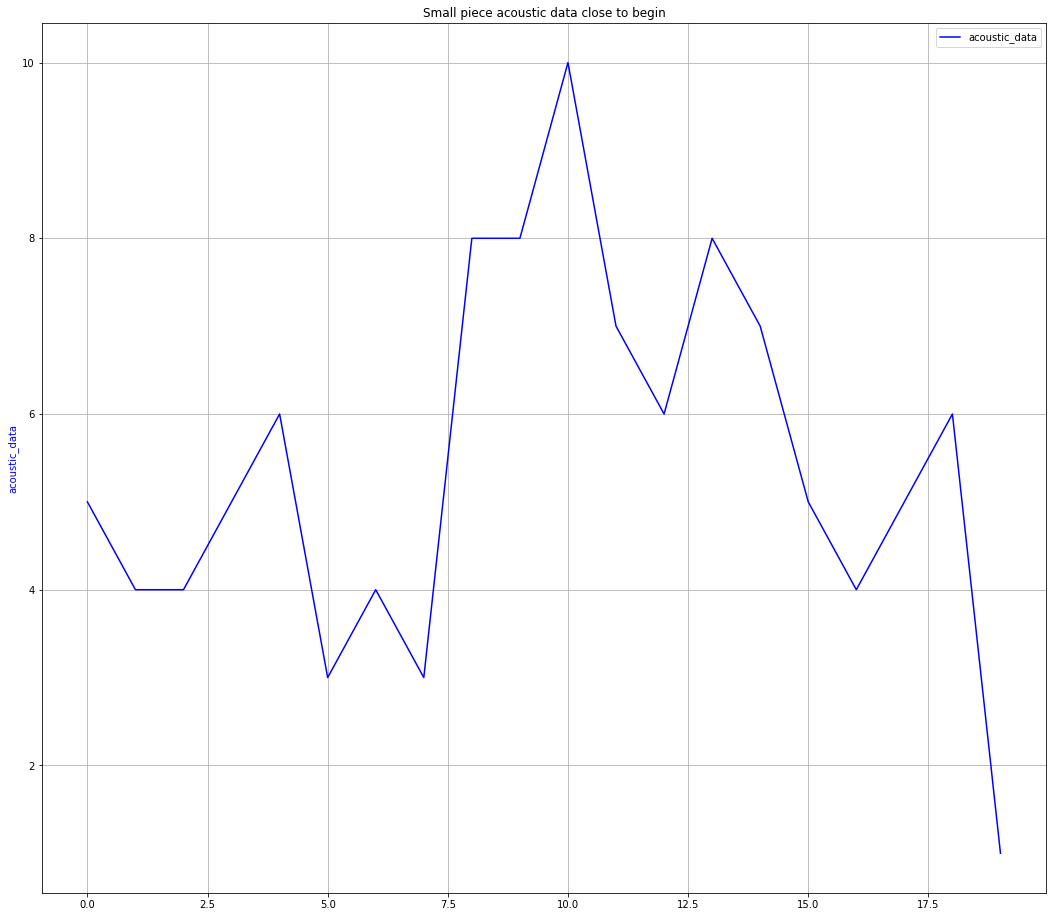

In [17]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin")
plt.plot(for_investigation_df['acoustic_data'].iloc[0:20], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

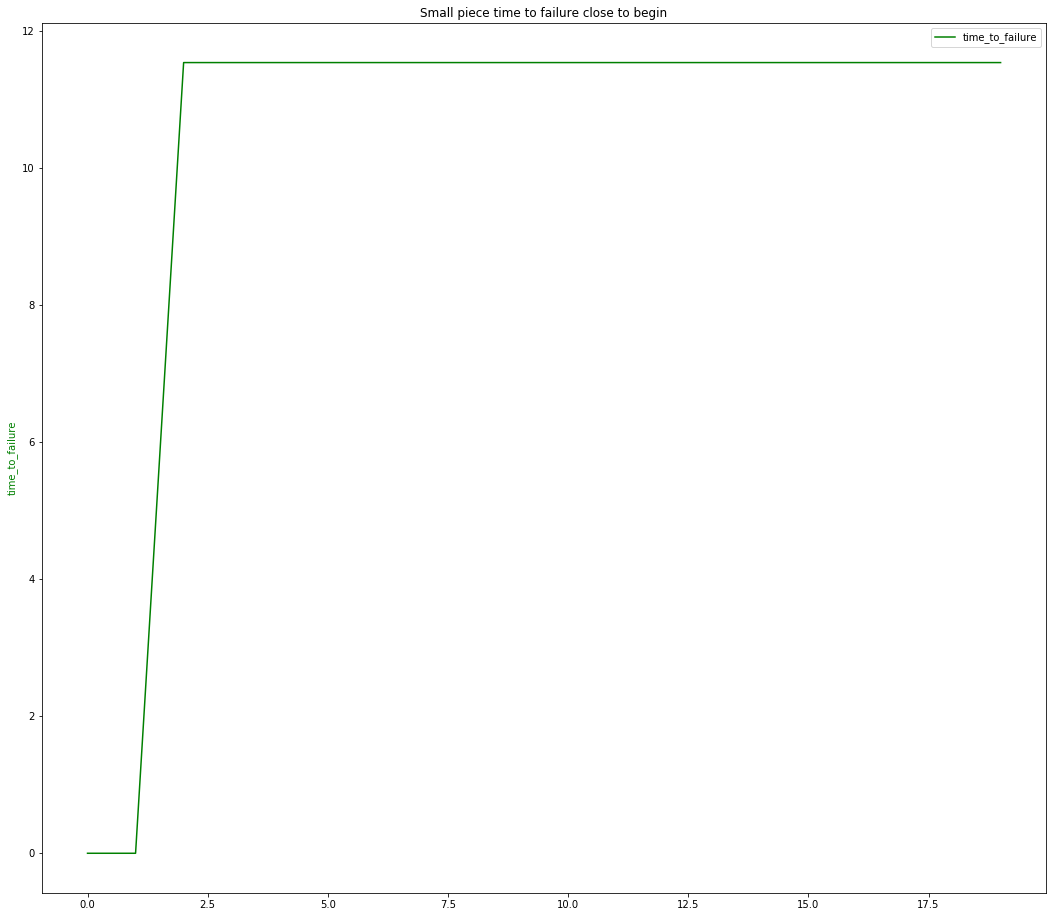

In [18]:
fig3, ax3 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure close to begin")
plt.plot(for_investigation_df['time_to_failure'].iloc[0:20], color='g')
ax3.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

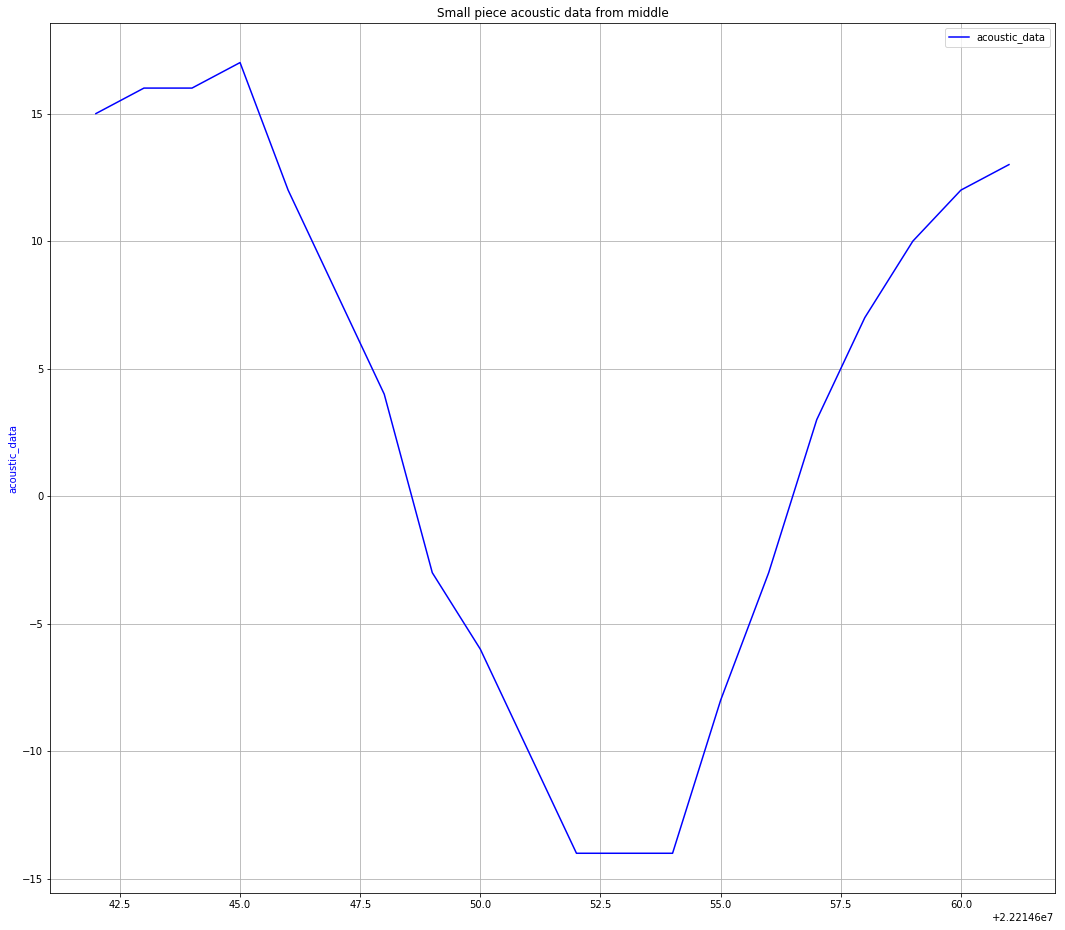

In [20]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 - 10:earthquake_1_data_len // 2 + 10], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

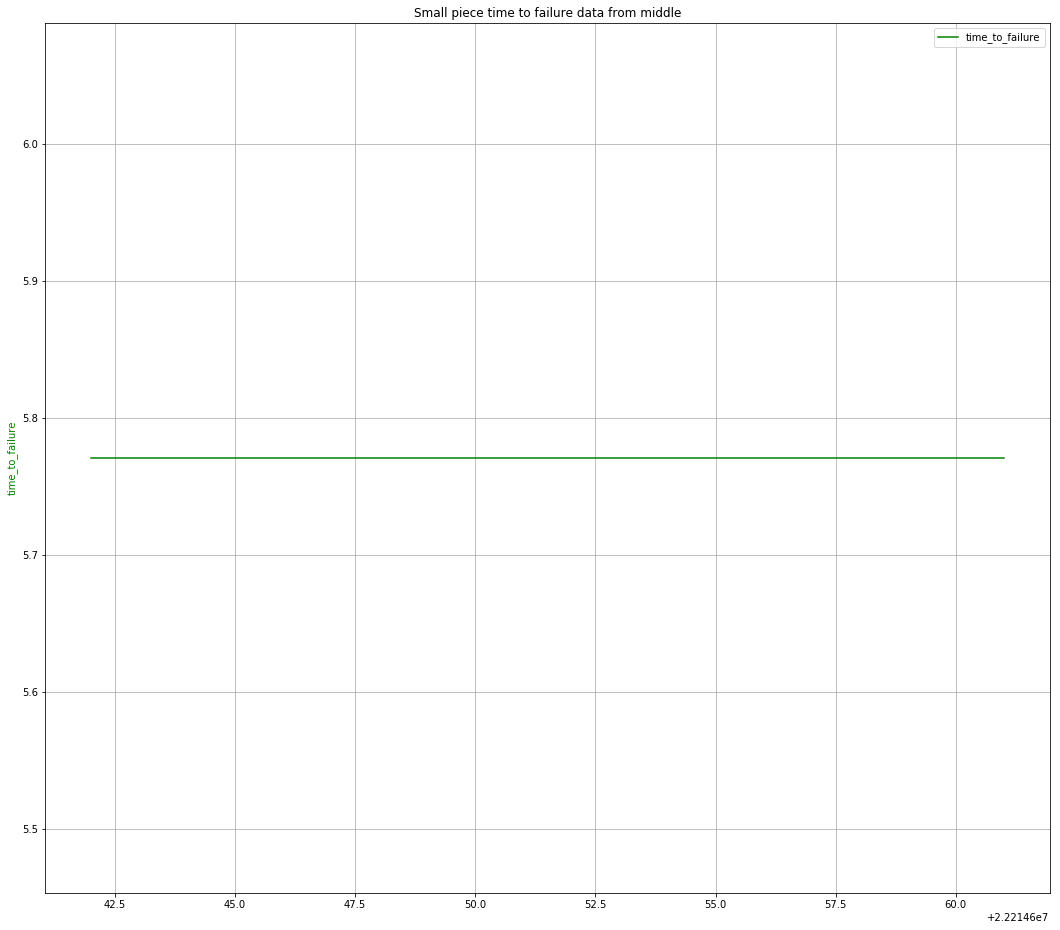

In [21]:
fig5, ax5 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure data from middle")
plt.plot(for_investigation_df['time_to_failure'].iloc[earthquake_1_data_len // 2 - 10:earthquake_1_data_len // 2 + 10], color='g')
ax5.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

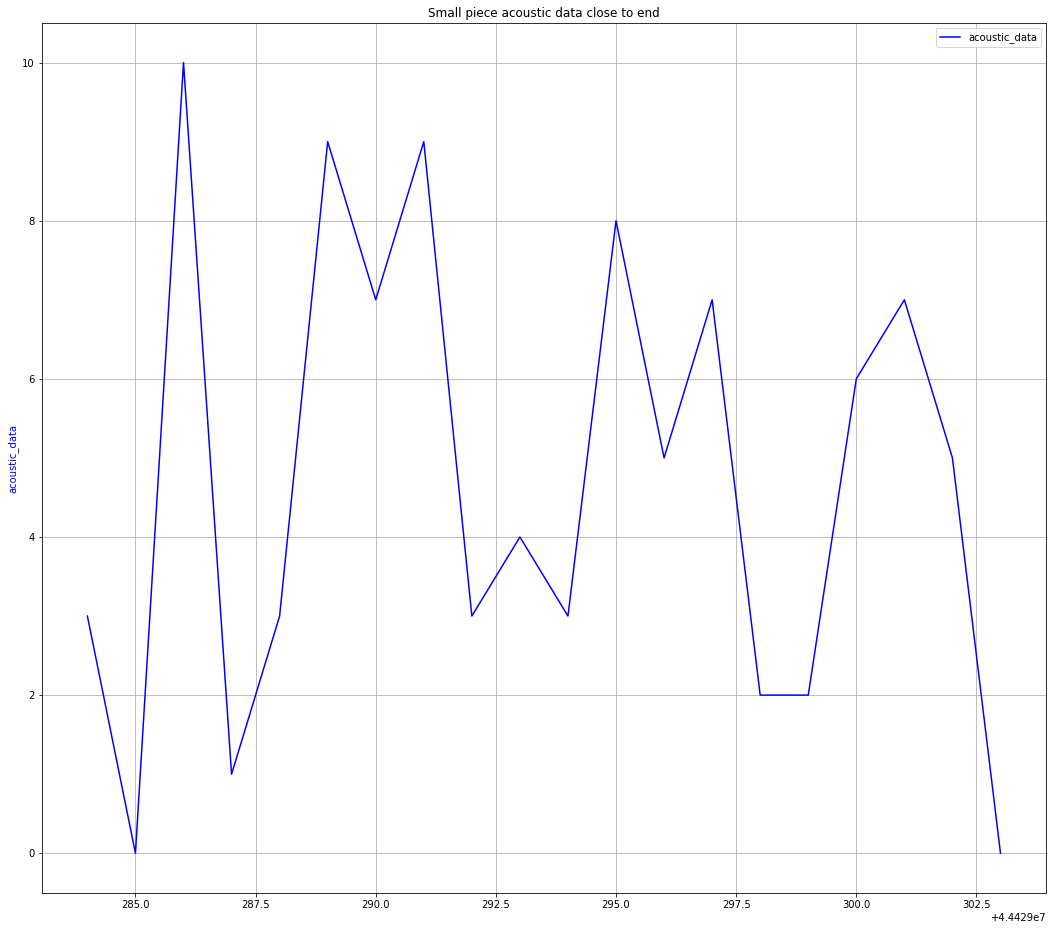

In [22]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end")
plt.plot(for_investigation_df['acoustic_data'].iloc[-20:], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

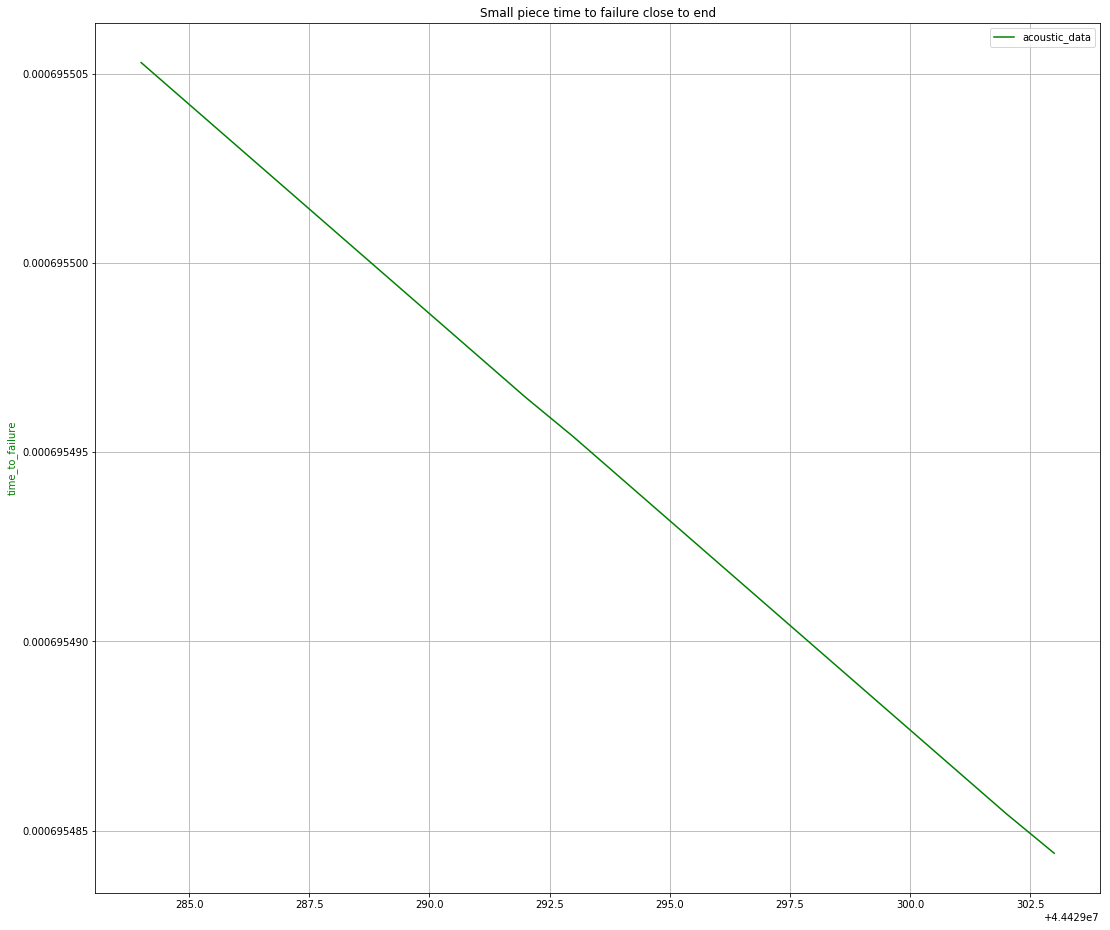

In [23]:
fig7, ax7 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure close to end")
plt.plot(for_investigation_df['time_to_failure'].iloc[-20:], color='g')
ax7.set_ylabel("time_to_failure", color='g')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

In [31]:
acoustic_data_idxmin = for_investigation_df['acoustic_data'].idxmin()
acoustic_data_min = for_investigation_df['acoustic_data'].min()
acoustic_data_idxmax = for_investigation_df['acoustic_data'].idxmax()
acoustic_data_max = for_investigation_df['acoustic_data'].max()

In [27]:
print(acoustic_data_idxmax)

43215973


In [28]:
for_investigation_df.shape[0]

44429304

In [30]:
print(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmax], acoustic_data_max)

3914.0 3914.0


In [32]:
print(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmin], acoustic_data_min)

-3301.0 -3301.0


In [33]:
print(acoustic_data_idxmax, acoustic_data_idxmin)

43215973 43215454


In [34]:
print(acoustic_data_idxmax -acoustic_data_idxmin)

519


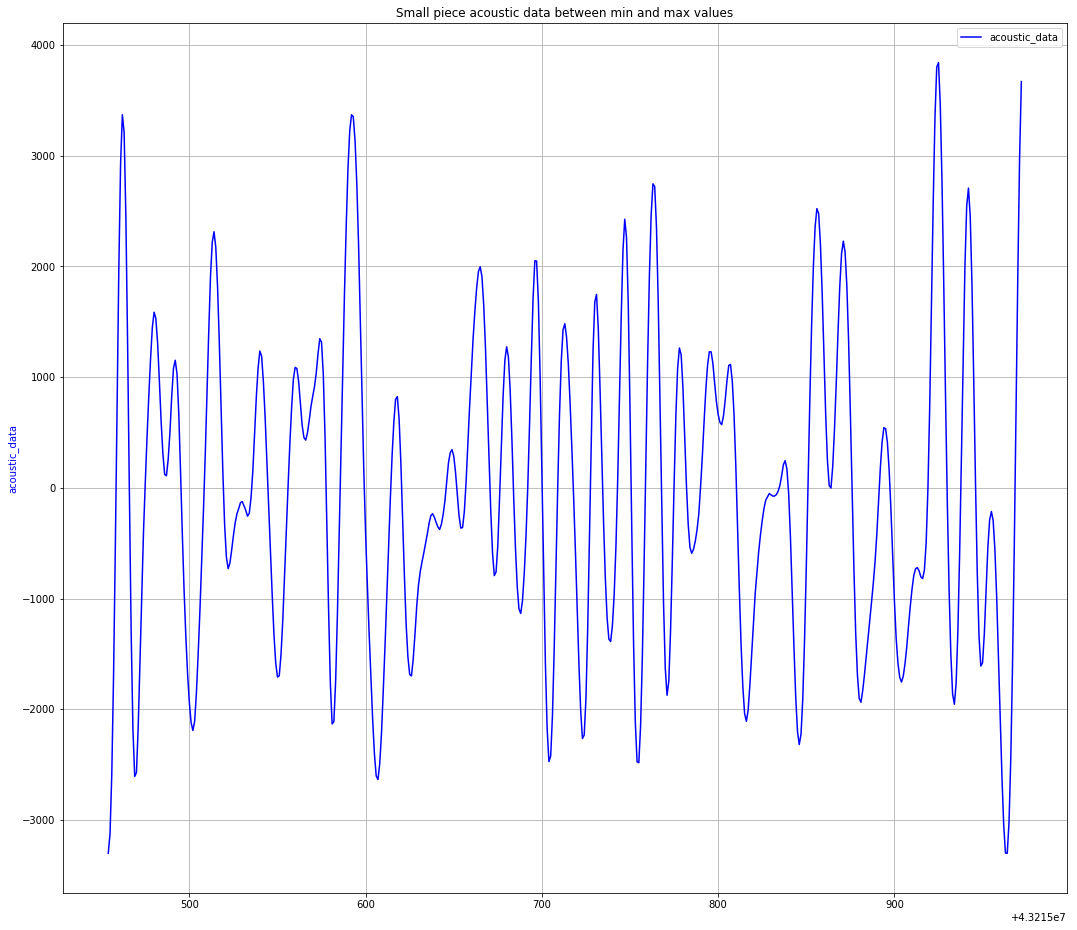

In [35]:
fig8, ax8 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data between min and max values")
plt.plot(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmin:acoustic_data_idxmax], color='b')
ax8.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

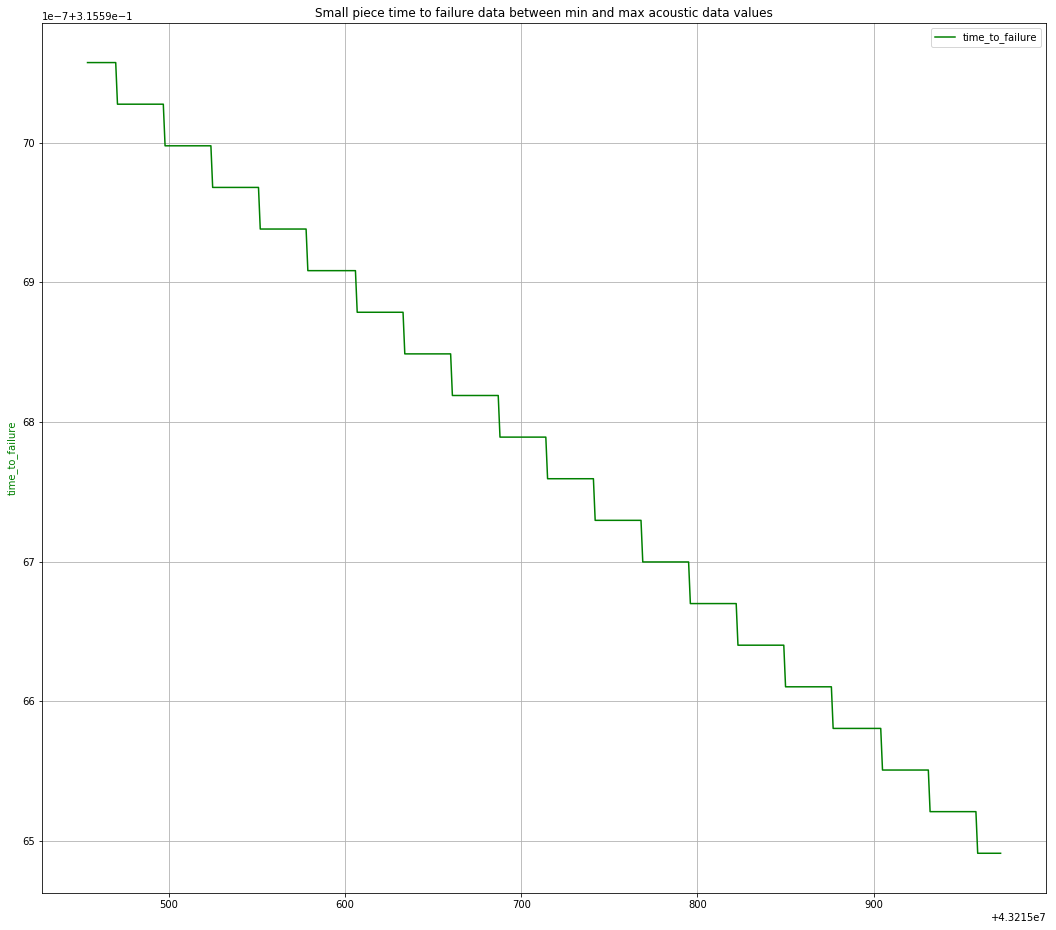

In [36]:
fig9, ax9 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure data between min and max acoustic data values")
plt.plot(for_investigation_df['time_to_failure'].iloc[acoustic_data_idxmin:acoustic_data_idxmax], color='g')
ax9.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)